# ⚕️ **ML4ICU** ⚕️



*   ⚕️ML4ICU is a machine learning project designed to enhance patient care in Intensive Care Units (ICUs) by accurately predicting patient deterioration.
*   ⚕️By analyzing vital signs such as heart rate, respiratory rate, body temperature, oxygen saturation, blood pressure, and demographic information, ML4ICU aims to provide early warnings of potential health crises.










## **Loading the Human Vital Sign Dataset**

In [ ]:
import pandas as pd

In [ ]:
path = "/content/drive/MyDrive/ColabNotebooks/ML4ICU/human_vital_signs_dataset_2024.csv"
df = pd.read_csv(path)
df.head(10)

,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP,Risk Category
0,1,60,12,2024-07-19 21:53:45.729841,36.861707,95.702046,124,86,37,Female,91.541618,1.679351,0.121033,38,32.459031,98.666667,High Risk
1,2,63,18,2024-07-19 21:52:45.729841,36.511633,96.689413,126,84,77,Male,50.704921,1.992546,0.117062,42,12.771246,98.000000,High Risk
2,3,63,15,2024-07-19 21:51:45.729841,37.052049,98.508265,131,78,68,Female,90.316760,1.770228,0.053200,53,28.821069,95.666667,Low Risk
3,4,99,16,2024-07-19 21:50:45.729841,36.654748,95.011801,118,72,41,Female,96.006188,1.833629,0.064475,46,28.554611,87.333333,High Risk
4,5,69,16,2024-07-19 21:49:45.729841,36.975098,98.623792,138,76,25,Female,56.020006,1.866419,0.118484,62,16.081438,96.666667,High Risk
5,6,79,12,2024-07-19 21:48:45.729841,36.884979,95.987129,130,70,22,Male,79.869933,1.922334,0.103963,60,21.613533,90.000000,Low Risk
6,7,81,17,2024-07-19 21:47:45.729841,37.273640,99.456716,118,84,43,Male,57.846565,1.831484,0.055885,34,17.245326,95.333333,High Risk
7,8,96,15,2024-07-19 21:46:45.729841,36.852633,97.124125,135,77,72,Female,71.758972,1.603888,0.073413,58,27.895118,96.333333,High Risk
8,9,83,12,2024-07-19 21:45:45.729841,36.044191,98.584497,111,84,50,Male,79.295332,1.672735,0.098520,27,28.339570,93.000000,Low Risk
9,10,66,15,2024-07-19 21:44:45.729841,36.957178,97.916267,131,77,61,Male,53.923400,1.896381,0.081364,54,14.994299,95.000000,High Risk


In [ ]:
df.describe()


,Patient ID,Heart Rate,Respiratory Rate,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP
count,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000
mean,100010.500000,79.533747,15.489451,36.748353,97.504372,124.437971,79.499625,53.446275,74.996419,1.750031,0.099970,44.938346,25.003625,94.479074
std,57740.944759,11.552894,2.294472,0.433290,1.442598,8.656946,5.757248,20.786802,14.471502,0.144554,0.028861,10.404945,6.447143,4.797891
min,1.000000,60.000000,12.000000,36.000004,95.000007,110.000000,70.000000,18.000000,50.000156,1.500001,0.050000,21.000000,12.505974,83.333333
25%,50005.750000,70.000000,13.000000,36.372613,96.256859,117.000000,75.000000,35.000000,62.423615,1.624777,0.074955,37.000000,20.134367,91.000000
50%,100010.500000,80.000000,15.000000,36.747741,97.509629,124.000000,79.000000,53.000000,74.977169,1.750478,0.099988,45.000000,24.320776,94.333333
75%,150015.250000,90.000000,17.000000,37.123003,98.755722,132.000000,84.000000,71.000000,87.539510,1.875310,0.124917,53.000000,29.187169,98.000000
max,200020.000000,99.000000,19.000000,37.499992,99.999963,139.000000,89.000000,89.000000,99.999765,1.999997,0.149999,69.000000,44.376487,105.666667


## **Checking for Null entries in Dataset**

In [ ]:
df.isnull().sum()   # Check missing values

,0
Patient ID,0
Heart Rate,0
Respiratory Rate,0
Timestamp,0
Body Temperature,0
Oxygen Saturation,0
Systolic Blood Pressure,0
Diastolic Blood Pressure,0
Age,0
Gender,0


## **Univariate Analysis**



*   Visualizing individual vital signs like heart rate, temperature, blood pressure, etc. Look for patterns, outliers, and trends in these features.




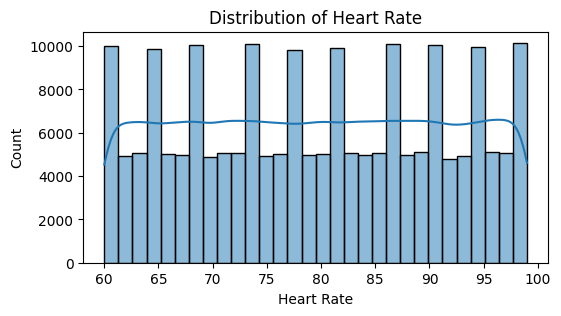

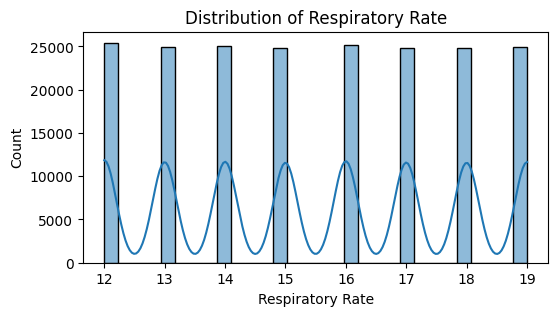

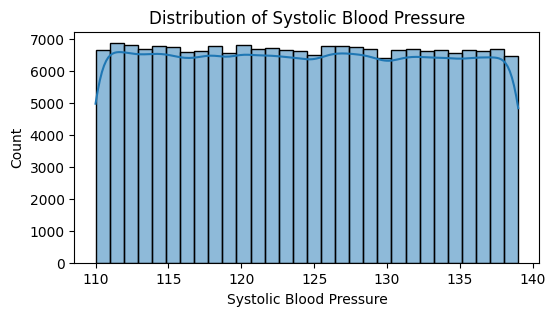

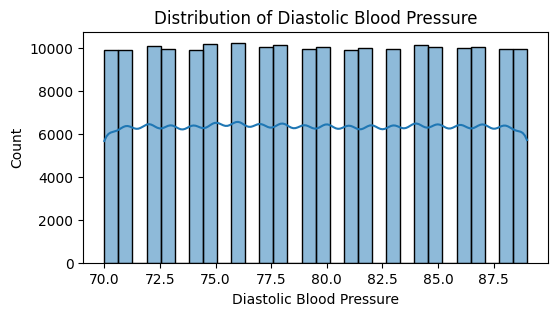

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.histplot(df['Heart Rate'], bins=30, kde=True)
plt.title('Distribution of Heart Rate')
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(df['Respiratory Rate'], bins=30, kde=True)
plt.title('Distribution of Respiratory Rate')
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(df['Systolic Blood Pressure'], bins=30, kde=True)
plt.title('Distribution of Systolic Blood Pressure')
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(df['Diastolic Blood Pressure'], bins=30, kde=True)
plt.title('Distribution of Diastolic Blood Pressure')
plt.show()

## **Multivariate Analysis**

*   Check for correlations between different vital signs and patient outcomes. This can help identify which features are more important.

*   In our dataset, we have correlations almost close to 0, so we dont have to deal with removing correlations between data, we've carefully taken the necessary feature for the model training.

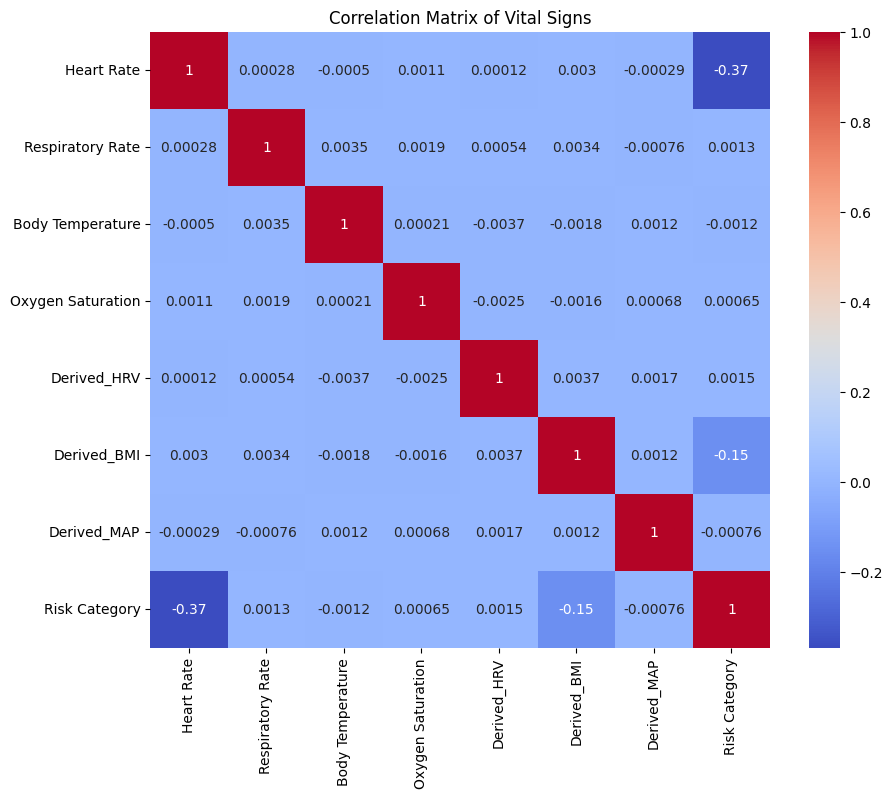

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named df with a column named 'date_time'
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Risk Category' column
df['Risk Category'] = le.fit_transform(df['Risk Category'])
# Define the relevant columns
relevant_columns = ['Heart Rate', 'Respiratory Rate', 'Body Temperature',
                    'Oxygen Saturation',
                    'Derived_HRV', 'Derived_BMI', 'Derived_MAP', 'Risk Category']

# Assuming you have a DataFrame named df
correlation_matrix = df[relevant_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Vital Signs')
plt.show()


### **Target Analysis**

*   a patient deteriorated, perform analysis based on the target feature. For example, check the distribution of vital signs for deteriorating vs. stable patients.

*   Heart failure: The heart may not be able to pump blood efficiently enough to meet the body's needs.

*   Arrhythmias: Irregular heart rhythms can disrupt the heart's electrical activity and lead to serious complications.

*   Blood clots: Increased blood flow can increase the risk of blood clots forming, which can lead to stroke or pulmonary embolism.

*    Organ damage: Prolonged high heart rates can strain the heart and other organs, potentially causing damage




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


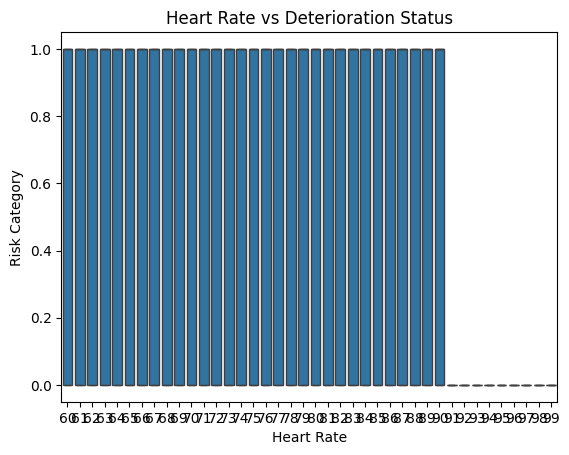

<Figure size 1000x800 with 0 Axes>

In [ ]:
sns.boxplot(x='Heart Rate', y='Risk Category', data=df)
plt.title('Heart Rate vs Deterioration Status', )
plt.figure(figsize=(10, 8))
plt.show()


**Normalization and Scaling is not needed here as the dataset is fine to work with.**

## **Searching for Outliers**

In [ ]:
import pandas as pd
import numpy as np

# Assuming your dataset is already loaded into a DataFrame named 'df'
# Replace 'df' with the name of your DataFrame if it's different

# List of relevant columns
relevant_columns = ['Heart Rate', 'Respiratory Rate', 'Body Temperature',
                    'Oxygen Saturation',
                    'Derived_HRV', 'Derived_BMI', 'Derived_MAP', 'Risk Category']

# Filter the DataFrame to include only the relevant columns
df_relevant = df[relevant_columns]

# Z-score method
def z_score_outliers(df):
    z_scores = np.abs((df - df.mean()) / df.std())
    return df[(z_scores > 3).any(axis=1)]

# IQR method
def iqr_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Find outliers using both methods
z_score_outliers_df = z_score_outliers(df_relevant)
# We'll consider this
print("Outliers detected using Z-score method:")
print(z_score_outliers_df)




Outliers detected using Z-score method:
        Heart Rate  Respiratory Rate  Body Temperature  Oxygen Saturation  \
9531            95                15         36.082649          97.319649   
97740           71                18         37.054677          96.497699   
157825          76                12         36.591064          96.359037   

        Derived_HRV  Derived_BMI  Derived_MAP  Risk Category  
9531       0.113006    44.347255    95.666667              0  
97740      0.113030    44.376487    94.666667              0  
157825     0.107156    44.367525    91.000000              0  


## **Removing Outliers from the dataset**

In [ ]:
import pandas as pd
import numpy as np

# Assuming your dataset is already loaded into a DataFrame named 'df'
# Replace 'df' with the name of your DataFrame if it's different

# List of relevant columns
relevant_columns = ['Heart Rate', 'Respiratory Rate', 'Body Temperature',
                    'Oxygen Saturation',
                    'Derived_HRV', 'Derived_BMI', 'Derived_MAP', 'Risk Category']

# Filter the DataFrame to include only the relevant columns
df_relevant = df[relevant_columns]

# Z-score method to identify outliers
z_scores = np.abs((df_relevant - df_relevant.mean()) / df_relevant.std())
outliers = (z_scores > 3).any(axis=1)

# Remove outliers
df_cleaned = df_relevant[~outliers]

print("Original DataFrame shape:", df_relevant.shape)
print("DataFrame shape after removing outliers:", df_cleaned.shape)
print(df_cleaned)

Original DataFrame shape: (200020, 8)
DataFrame shape after removing outliers: (200017, 8)
        Heart Rate  Respiratory Rate  Body Temperature  Oxygen Saturation  \
0               60                12         36.861707          95.702046   
1               63                18         36.511633          96.689413   
2               63                15         37.052049          98.508265   
3               99                16         36.654748          95.011801   
4               69                16         36.975098          98.623792   
...            ...               ...               ...                ...   
200015          87                17         37.058905          95.357470   
200016          76                16         36.463631          99.340786   
200017          81                13         36.665477          98.120530   
200018          83                13         37.019873          95.362426   
200019          69                14         37.012931        

### **Feature Engineering, Since our dataset has already the necessary features with derived features from existing features, we go for the derived features in it.**

### **We do Hypothesis Testing where we check for Gaussian distribution in the data, Homogeneity of Variance**

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro

# Assuming your dataset is already loaded into a DataFrame named 'df'
# Replace 'df' with the name of your DataFrame if it's different

# List of relevant columns
relevant_columns = ['Heart Rate', 'Respiratory Rate', 'Body Temperature',
                    'Oxygen Saturation',
                    'Derived_HRV', 'Derived_BMI', 'Derived_MAP', 'Risk Category']

# Filter the DataFrame to include only the relevant columns
df_relevant = df_cleaned[relevant_columns]

# Shapiro-Wilk test for normality
for column in relevant_columns:
    stat, p = shapiro(df_relevant[column])
    print(f'{column}: Statistics={stat}, p={p}')
    if p > 0.05:
        print(f'{column} looks Gaussian (fail to reject H0)')
    else:
        print(f'{column} does not look Gaussian (reject H0)')


Heart Rate: Statistics=0.9532905560687831, p=1.4511383059924045e-105
Heart Rate does not look Gaussian (reject H0)
Respiratory Rate: Statistics=0.925469338900617, p=1.8760456857447644e-118
Respiratory Rate does not look Gaussian (reject H0)
Body Temperature: Statistics=0.9548457868151949, p=1.1652568839543813e-104
Body Temperature does not look Gaussian (reject H0)
Oxygen Saturation: Statistics=0.9551210210229484, p=1.6957018105130398e-104
Oxygen Saturation does not look Gaussian (reject H0)
Derived_HRV: Statistics=0.9548624225176247, p=1.1919136148315407e-104
Derived_HRV does not look Gaussian (reject H0)
Derived_BMI: Statistics=0.9772697711350623, p=3.5541361534344955e-87
Derived_BMI does not look Gaussian (reject H0)
Derived_MAP: Statistics=0.9911912903393192, p=1.0540205966798775e-65
Derived_MAP does not look Gaussian (reject H0)
Risk Category: Statistics=0.6356741619062833, p=7.424162850631605e-168
Risk Category does not look Gaussian (reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 200017.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
from scipy.stats import levene

# Example groups (replace with your actual groups)
group1 = df_cleaned['Heart Rate']
group2 = df_cleaned['Respiratory Rate']

# Levene's test for homogeneity of variances
stat, p = levene(group1, group2)
print(f'Levene’s test: Statistics={stat}, p={p}')
if p > 0.05:
    print('Variances are equal (fail to reject H0)')
else:
    print('Variances are not equal (reject H0)')


Levene’s test: Statistics=366280.3091907436, p=0.0
Variances are not equal (reject H0)


## **Visualizing Dataset after for further details**

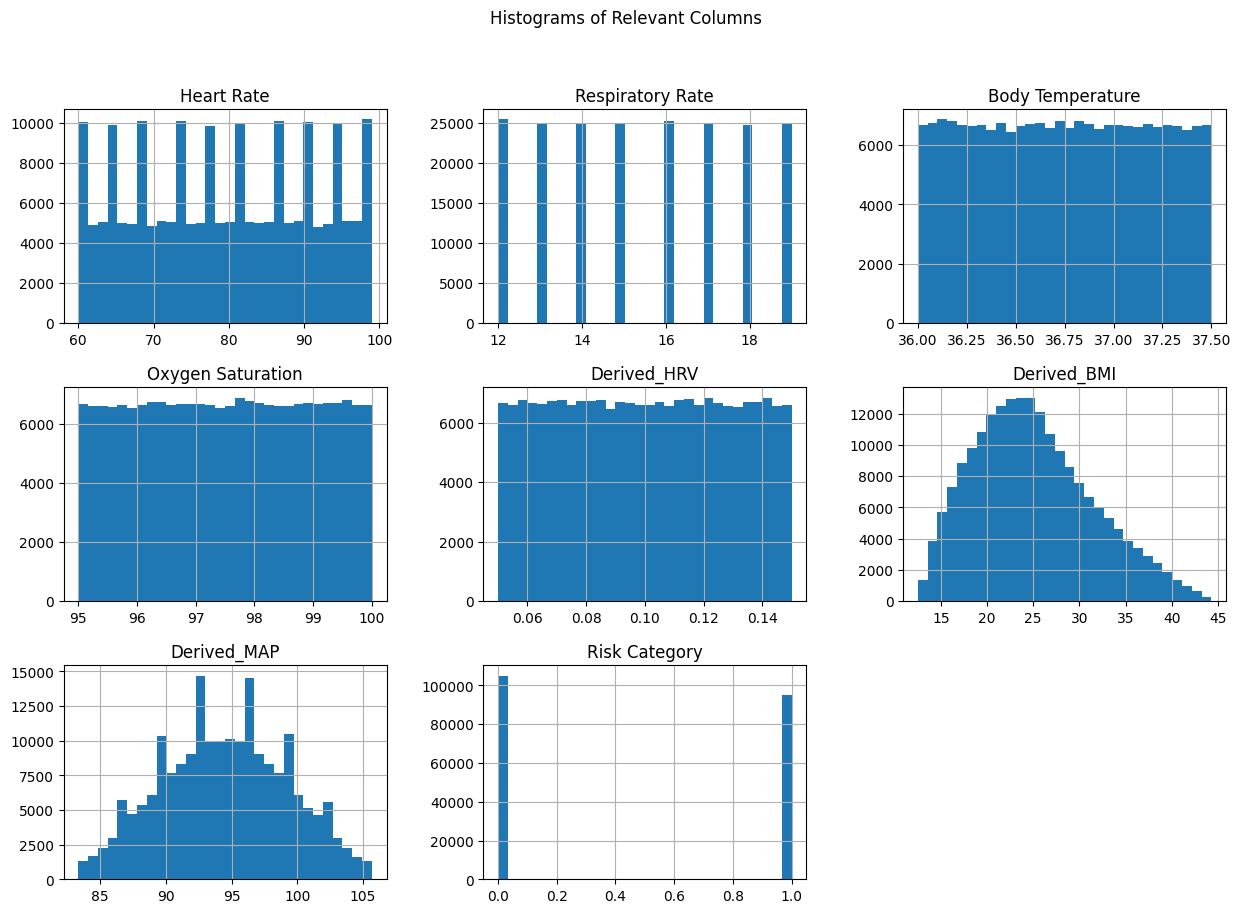

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is already loaded into a DataFrame named 'df'
# Replace 'df' with the name of your DataFrame if it's different

# List of relevant columns
relevant_columns = ['Heart Rate', 'Respiratory Rate', 'Body Temperature',
                    'Oxygen Saturation', 'Derived_HRV', 'Derived_BMI', 'Derived_MAP', 'Risk Category']

# Plot histograms
df_cleaned[relevant_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Relevant Columns')
plt.show()


* Heart Rate:

    * The distribution appears roughly uniform, but there are gaps between bins, indicating a possible issue with data recording or binning. This could suggest discrete intervals in the data collection process.

* Derived_BMI:

    * This feature shows a right-skewed distribution, with more values concentrated at lower BMI ranges and a long tail on the higher end. This indicates that most of the population falls within a lower BMI range.Since the distribution is skewed, you might want to transform this feature (e.g., log transformation) to reduce skewness for certain models.

* Derived_MAP and others:
    * This feature shows a normal distribution, which is ideal for many machine learning models. No changes are necessary here.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

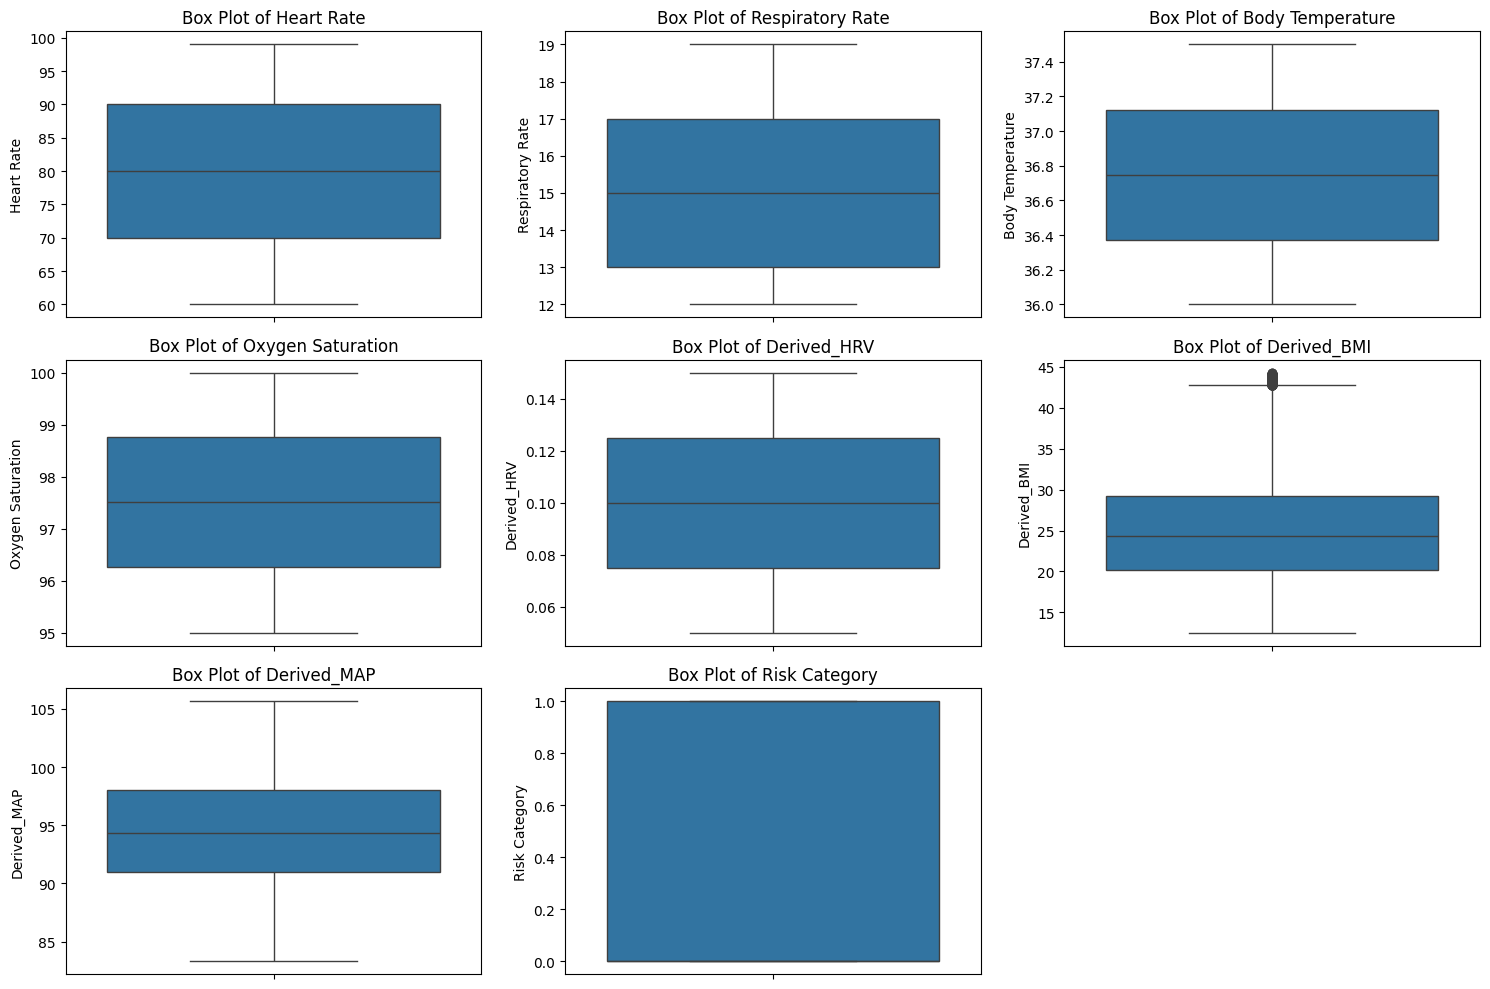

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(relevant_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()


For the features, Heart Rate, Respiratory Rate, Body Temperature, Oxygen Saturation, Derived_HRV, Derived_MAP:


*   These features exhibit relatively symmetric distributions.
The whiskers (which represent the range of the data within 1.5 times the interquartile range (IQR)) are well within limits, with no visible outliers.
The interquartile range (IQR) for these features is relatively narrow, meaning that most values are clustered around the median.

For Derived_BMI

*   The box plot for Derived_BMI shows some outliers (black circles above the upper whisker).




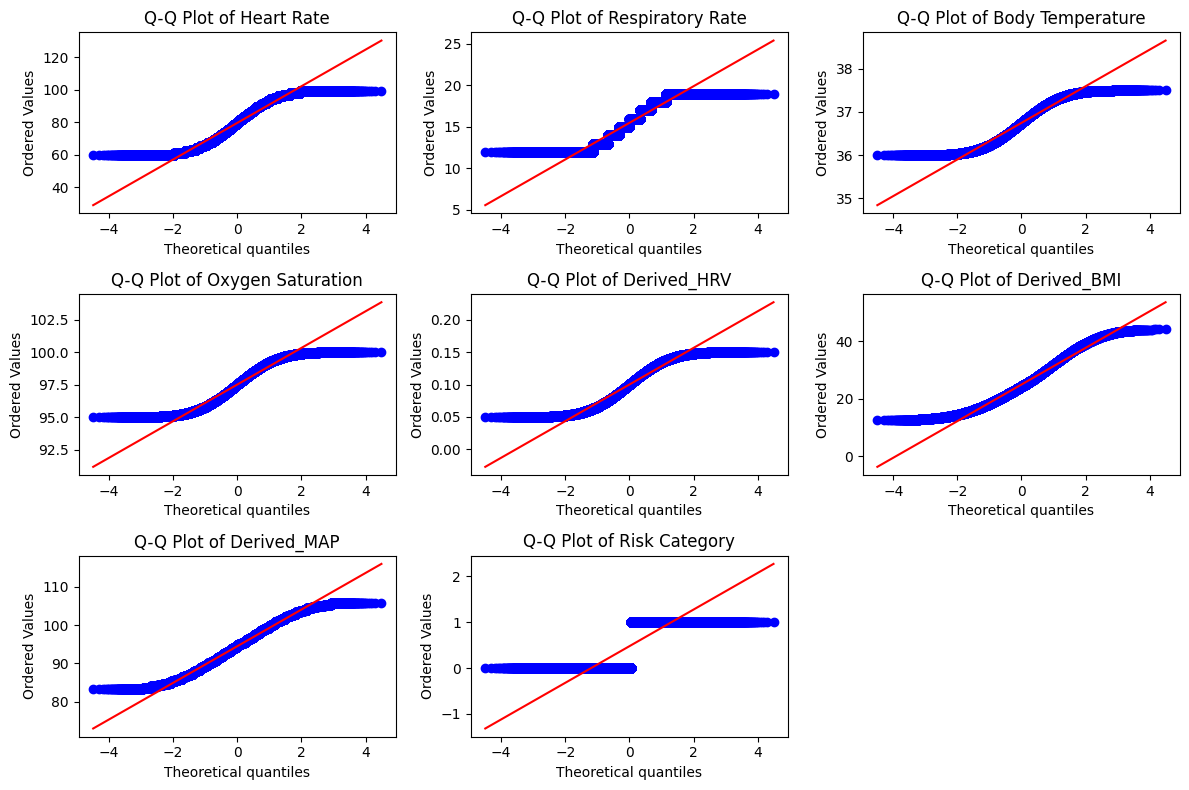

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Plot Q-Q plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(relevant_columns):
    plt.subplot(3, 3, i + 1)
    stats.probplot(df_cleaned[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
plt.tight_layout()
plt.show()


The curves deviate significantly from the red line at both ends, suggesting that these features are not normally distributed. The "S" shape seen in most plots indicates that the distributions are likely skewed.

## **Actions**

Heart rate Interpolation

Before Interpolation:
0         60
1         63
2         63
3         99
4         69
          ..
200015    87
200016    76
200017    81
200018    83
200019    69
Name: Heart Rate, Length: 200017, dtype: int64

After Interpolation:
0         60
1         63
2         63
3         99
4         69
          ..
200015    87
200016    76
200017    81
200018    83
200019    69
Name: Heart Rate, Length: 200017, dtype: int64


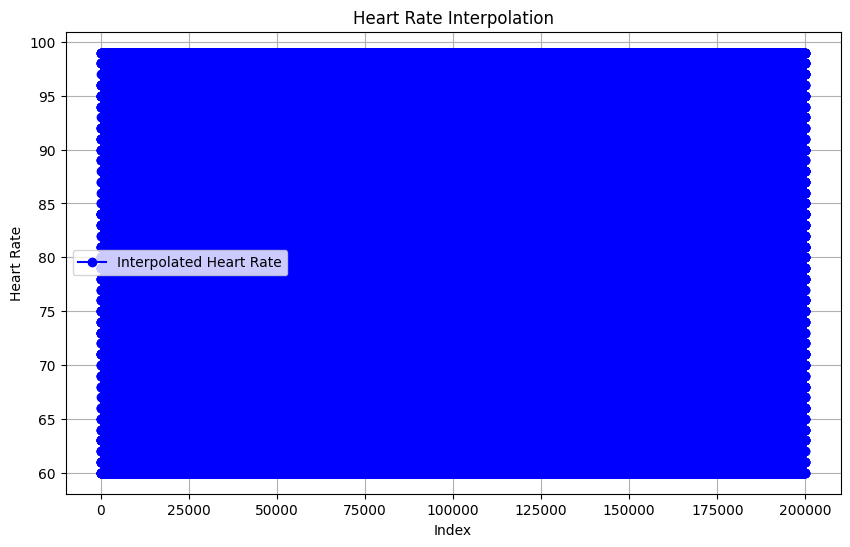

In [ ]:
import matplotlib.pyplot as plt

# Check if 'Heart Rate' column exists in df_cleaned
if 'Heart Rate' in df_cleaned.columns:
    # Display the 'Heart Rate' column before interpolation
    print("Before Interpolation:")
    print(df_cleaned['Heart Rate'])

    # Apply linear interpolation to fill in missing values
    df_cleaned['Heart Rate'] = df_cleaned['Heart Rate'].interpolate(method='linear')

    # Display the 'Heart Rate' column after interpolation
    print("\nAfter Interpolation:")
    print(df_cleaned['Heart Rate'])

    # Plot to visualize the interpolated values
    plt.figure(figsize=(10,6))
    plt.plot(df_cleaned['Heart Rate'], marker='o', label='Interpolated Heart Rate', linestyle='-', color='b')
    plt.title('Heart Rate Interpolation')
    plt.xlabel('Index')
    plt.ylabel('Heart Rate')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Column 'Heart Rate' not found in df_cleaned.")



Derived_BMI: from boxplot has outliers


Lower Bound for Outliers: 6.554834841835058
Upper Bound for Outliers: 42.76648549805866

Number of rows before removing outliers: 200017
Number of rows after removing outliers: 199527


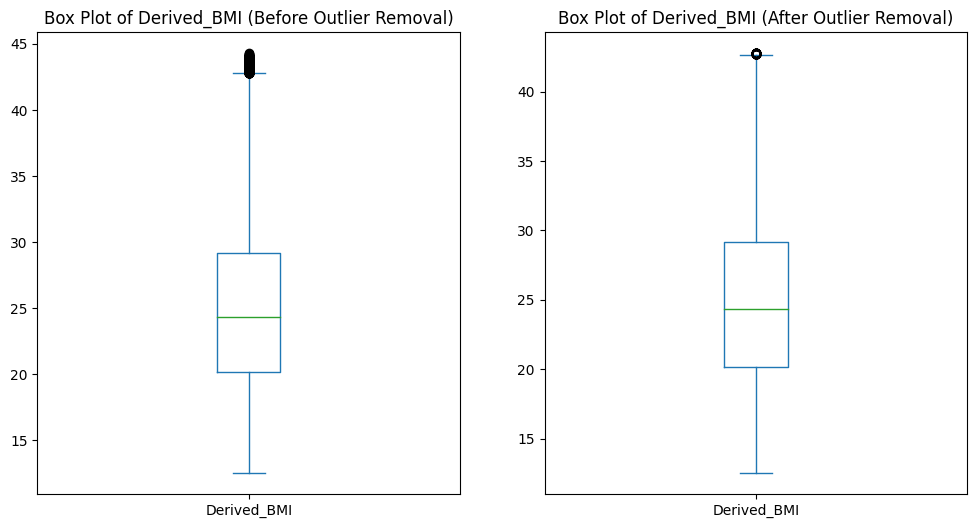

In [ ]:
import numpy as np

# Check if 'Derived_BMI' column exists in df_cleaned
if 'Derived_BMI' in df_cleaned.columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for Derived_BMI
    Q1 = df_cleaned['Derived_BMI'].quantile(0.25)
    Q3 = df_cleaned['Derived_BMI'].quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Lower Bound for Outliers: {lower_bound}")
    print(f"Upper Bound for Outliers: {upper_bound}")

    # Remove outliers by keeping only values within the lower and upper bounds
    df_cleaned_no_outliers = df_cleaned[(df_cleaned['Derived_BMI'] >= lower_bound) & (df_cleaned['Derived_BMI'] <= upper_bound)]

    print("\nNumber of rows before removing outliers:", len(df_cleaned))
    print("Number of rows after removing outliers:", len(df_cleaned_no_outliers))

    # Plot box plot before and after outlier removal
    plt.figure(figsize=(12,6))

    # Box plot before removing outliers
    plt.subplot(1, 2, 1)
    df_cleaned['Derived_BMI'].plot.box()
    plt.title('Box Plot of Derived_BMI (Before Outlier Removal)')

    # Box plot after removing outliers
    plt.subplot(1, 2, 2)
    df_cleaned_no_outliers['Derived_BMI'].plot.box()
    plt.title('Box Plot of Derived_BMI (After Outlier Removal)')

    plt.show()
else:
    print("Column 'Derived_BMI' not found in df_cleaned.")
df_cleaned = df_cleaned_no_outliers
df_sampled = df_cleaned.sample(frac=0.01, random_state=42)

In [ ]:
import torch

if torch.cuda.is_available():
    print("GPU is available")
else:
    print("GPU is not available")


GPU is not available


# **Model Training and Testing**
## **Bagging with SVC**


* Bagging (Bootstrap Aggregating) is a popular ensembling technique in machine learning that involves training multiple instances of a base model (e.g., decision trees, SVC) on different subsets of the training data and then combining their predictions. The step breakdown is:

    * Bootstrap Sampling:

      * The algorithm creates multiple bootstrap samples from the original training data. Each bootstrap sample is a random subset of the original data, with replacement. This means that some data points may appear multiple times in a bootstrap sample while others may not appear at all.

    * Model Training:

      * A base model (SVC) is trained on each bootstrap sample. This results in a collection of models, each with slightly different characteristics due to the different training data.

    * Prediction and Combination:

      * When making predictions on new data, each base model provides its own prediction. The final prediction is typically an aggregate of the individual predictions. Common aggregation methods include:
      Voting: The most common prediction among the base models is chosen as the final prediction.





In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler

# Assuming 'df_cleaned' is your cleaned dataset
# Replace 'Risk Category' with the actual name of your target column

# Define features and target variable
features = ['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 'Derived_HRV', 'Derived_BMI', 'Derived_MAP']
target_variable = 'Risk Category'
df_sampled = df_cleaned.sample(frac=0.01, random_state=42)
X = df_cleaned[features]
y = df_cleaned[target_variable]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to standardize them
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVC model with regularization
svc = SVC(C=1, kernel='rbf', gamma='scale')

# Apply Bagging to the SVC model to reduce overfitting
bagging_model = BaggingClassifier(estimator=svc, n_estimators=10, random_state=42)

# Train the model on the training set
bagging_model.fit(X_train_scaled, y_train)

# Predict on the training set
y_train_pred = bagging_model.predict(X_train_scaled)

# Predict on the test set
y_test_pred = bagging_model.predict(X_test_scaled)

# Evaluate the model on the training set
print("Training Set Evaluation:")
print(classification_report(y_train, y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

# Evaluate the model on the test set
print("\nTest Set Evaluation:")
print(classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Training Set Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     83691
           1       0.98      0.98      0.98     75930

    accuracy                           0.98    159621
   macro avg       0.98      0.98      0.98    159621
weighted avg       0.98      0.98      0.98    159621

Training Confusion Matrix:
 [[81891  1800]
 [ 1879 74051]]

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     20931
           1       0.98      0.97      0.97     18975

    accuracy                           0.98     39906
   macro avg       0.98      0.98      0.98     39906
weighted avg       0.98      0.98      0.98     39906

Test Confusion Matrix:
 [[20487   444]
 [  516 18459]]



* **Benefits of Bagging with SVMs:**

    * *Reduced Overfitting:* By training multiple SVMs on different subsets of the data, bagging can help to reduce overfitting, which is a common problem with SVMs, especially when using complex kernels.

    * *Improved Accuracy:* Bagging can often improve the accuracy of SVM models, especially when the data is noisy or contains outliers.

    * *Increased Robustness:* Bagging can make SVM models more robust to changes in the training data.

    * *Parallel Processing:* Bagging can be easily parallelized, as each SVM model can be trained independently. This can significantly speed up the training process, especially for large datasets.

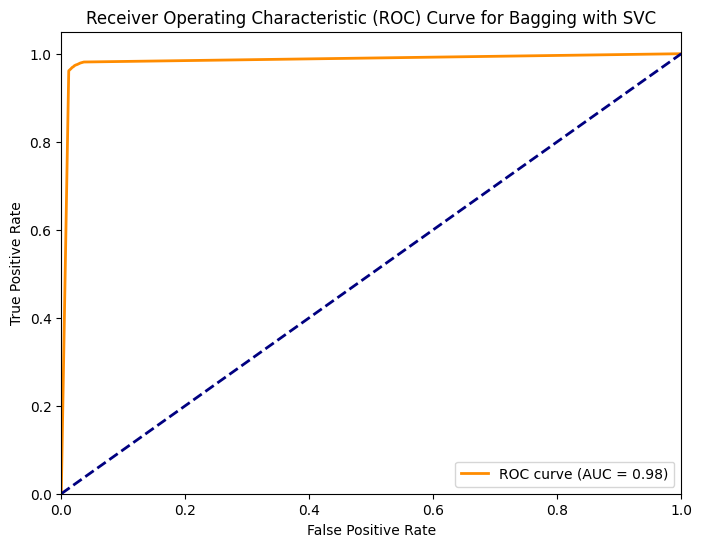

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtain the predicted probabilities for the test set
y_test_proba = bagging_model.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Bagging with SVC')
plt.legend(loc="lower right")
plt.show()


* The ROC curve plotted for the Bagging Classifier with SVC shows strong performance, with an AUC of 0.98. Here are the key inferences:

     * High AUC Value: The area under the curve (AUC) is 0.98, which indicates that the model has excellent discriminatory power between the positive and negative classes.

     * True Positive Rate (TPR) vs. False Positive Rate (FPR):

         * The curve stays close to the top-left corner, showing that the model has a high true positive rate while maintaining a low false positive rate.
         
* This means the model is very good at correctly identifying positive cases (e.g., patient deterioration) without generating many false positives (incorrectly predicting deterioration).


# **Model Overfit?**

   * Both the training and test performance were close (around 98% accuracy), which suggests the model generalizes well and is not overfitting.

   * The confusion matrix showed very few false positives and false negatives in both the training and test sets, which aligns with good generalization.

   * We'll check for the cross validation score to check, the performance remains consistently high across multiple folds.


In [ ]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation
cv_scores = cross_val_score(bagging_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Output the individual fold scores and the mean score
print("Cross-validation scores for each fold:", cv_scores)
print("Mean accuracy from cross-validation:", np.mean(cv_scores))

Cross-validation scores for each fold: [0.97309319 0.97434532 0.9740634  0.97613081 0.97384413]
Mean accuracy from cross-validation: 0.9742953696705478


 **INFERENCES**

 * The individual fold scores range from approximately 0.9731 to 0.9761, indicating that the model consistently achieves around 97.3% to 97.6% accuracy on different subsets of the data. This suggests that the model is likely well-fitted to the data.

 * The mean accuracy across all folds is about 0.9743, or 97.43%. This is a strong indication that your model generalizes well to unseen data, as it maintains high accuracy even when evaluated on different subsets.

 * The closeness of the fold scores suggests low variance, meaning that the model's performance is stable across different data splits. This is a positive sign, as it implies that the model is not overly sensitive to the specific training data used in any particular fold.



## **Saving the Model**

In [ ]:
!pip install joblib

**Saving the model**

In [ ]:
import os
import joblib

# Specify the folder path
folder_path = '/content/drive/MyDrive/ColabNotebooks/ML4ICU'

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Save the model and scaler to the folder
joblib.dump(bagging_model, os.path.join(folder_path, 'patient_deterioration_model.pkl'))
joblib.dump(scaler, os.path.join(folder_path, 'scaler.pkl'))


['/content/drive/MyDrive/ColabNotebooks/ML4ICU/scaler.pkl']

# **Mathematical Modelling of Bagging with Support Vector Classifier**

In [ ]:
pip install cvxopt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 89.4 MB/s eta 0:00:00


**Calculate the Kernel Matrix**

In [ ]:
import pandas as pd
import numpy as np

# Assuming df_sampled is your DataFrame with features and target
# df_sampled should have the features and a target column named 'Risk_Category'

# Example DataFrame structure
# df_sampled = pd.DataFrame({
#     'Heart Rate': [70, 75, 65, 80],
#     'Respiratory Rate': [18, 20, 17, 22],
#     'Risk_Category': [1, 1, 0, 0]  # 1 for low risk, 0 for high risk
# })
features = ['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 'Derived_HRV', 'Derived_BMI', 'Derived_MAP']
target_variable = 'Risk Category'
# Extract features and target
X = df_sampled.drop(columns=target_variable).values  # Features
y = df_sampled[target_variable].values  # Target variable

# Hyperparameter for RBF kernel
gamma = 0.5

# RBF Kernel function
def rbf_kernel(x_i, x_j, gamma):
    return np.exp(-gamma * np.linalg.norm(x_i - x_j) ** 2)

# Compute the kernel matrix
def compute_kernel_matrix(X, gamma):
    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))

    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = rbf_kernel(X[i], X[j], gamma)

    return K

# Calculate kernel matrix K
K = compute_kernel_matrix(X, gamma)
print("Kernel Matrix K:\n", K)



Kernel Matrix K:
 [[1.00000000e+000 1.01024607e-086 1.10622645e-208 ... 2.62646885e-169
  2.36453205e-115 1.52363682e-026]
 [1.01024607e-086 1.00000000e+000 1.70374848e-072 ... 8.50112652e-038
  3.93598546e-011 3.59272336e-153]
 [1.10622645e-208 1.70374848e-072 1.00000000e+000 ... 1.66751428e-009
  1.52312914e-042 0.00000000e+000]
 ...
 [2.62646885e-169 8.50112652e-038 1.66751428e-009 ... 1.00000000e+000
  2.43277180e-020 7.06911723e-293]
 [2.36453205e-115 3.93598546e-011 1.52312914e-042 ... 2.43277180e-020
  1.00000000e+000 7.12772452e-211]
 [1.52363682e-026 3.59272336e-153 0.00000000e+000 ... 7.06911723e-293
  7.12772452e-211 1.00000000e+000]]


**Formulate the Dual Problem**

In [ ]:
from cvxopt import matrix, solvers

# Define the dual problem
def solve_dual_problem(K, y, C):
    n_samples = K.shape[0]

    # Prepare matrices for quadratic programming
    P = matrix(np.outer(y, y) * K)
    q = matrix(-np.ones(n_samples))
    G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
    h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    A = matrix(y, (1, n_samples), 'd')
    b = matrix(0.0)

    # Solve the dual problem
    solution = solvers.qp(P, q, G, h, A, b)
    alphas = np.ravel(solution['x'])

    return alphas

# Hyperparameter for C
C = 1.0

# Solve for Lagrange multipliers
alphas = solve_dual_problem(K, y, C)
print("Lagrange multipliers α:\n", alphas)


     pcost       dcost       gap    pres   dres
 0: -1.0570e+03 -3.0520e+03  8e+03  1e+00  6e-16
 1: -8.7933e+02 -1.6788e+03  8e+02  1e-02  4e-16
 2: -1.0382e+03 -1.0711e+03  3e+01  6e-04  4e-16
 3: -1.0568e+03 -1.0571e+03  3e-01  6e-06  2e-16
 4: -1.0570e+03 -1.0570e+03  3e-03  6e-08  4e-16
 5: -1.0570e+03 -1.0570e+03  3e-05  6e-10  3e-16
Optimal solution found.
Lagrange multipliers α:
 [-1.76842958e-24 -5.07491150e-24  9.99999982e-01 ...  9.99999982e-01
  9.99999982e-01 -1.78368176e-25]


**Calculate the decision function**

In [ ]:
# Calculate the decision function
def decision_function(X, alphas, y, K):
    return np.dot((alphas * y), K)

# Compute decision function for training data
decision_scores = decision_function(X, alphas, y, K)
print("Decision function scores:\n", decision_scores)

# To classify new instances, use the following
def classify(decision_scores):
    return np.where(decision_scores > 0, 1, 0)  # Predict 1 if score > 0, else 0

# Classify the training data
predictions = classify(decision_scores)
print("Predictions:\n", predictions)


Decision function scores:
 [-1.13394793e-24 -8.87269630e-24  1.45486662e-42 ... -9.78771405e-33
 -6.65213868e-25 -8.17512287e-25]
Predictions:
 [0 0 1 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


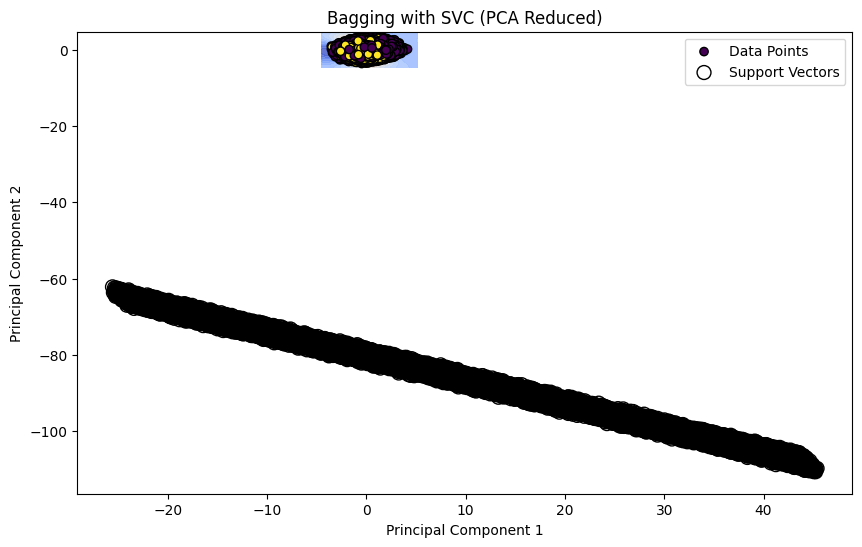

In [ ]:
from sklearn.decomposition import PCA
# Reduce dimensions to 2D using PCA for plotting
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train_scaled)

# Create a mesh grid for plotting the decision boundary
x_min, x_max = X_train_reduced[:, 0].min() - 1, X_train_reduced[:, 0].max() + 1
y_min, y_max = X_train_reduced[:, 1].min() - 1, X_train_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid using the decision function of BaggingClassifier
Z = bagging_model.estimators_[0].decision_function(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plotting the decision boundary and support vectors
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 25), cmap='coolwarm', alpha=0.8)

# Scatter plot of the reduced data points
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, edgecolors='k', marker='o', label='Data Points')

# Plot support vectors of the first SVC model from bagging
support_vectors = bagging_model.estimators_[0].support_vectors_
support_vectors_transformed = pca.transform(scaler.transform(support_vectors))
plt.scatter(support_vectors_transformed[:, 0], support_vectors_transformed[:, 1],
            facecolors='none', s=100, edgecolors='k', marker='o', label='Support Vectors')

plt.title("Bagging with SVC (PCA Reduced)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


**INFERENCES**

* The Bagging model with an SVM classifier appears to be effective in separating the two classes in the reduced feature space.

* The decision boundary is relatively linear, suggesting that the PCA reduction has captured the most important variance in the data.

* The support vectors are concentrated along the decision boundary, indicating that these points are crucial for defining the classification model.

* The data points are clustered in two distinct regions, which is consistent with the clear separation achieved by the decision boundary.